# Übung I:  Vektoren und Matrizen in Python

Die lineare Algebra ist die grundlegende Sprache der Quantenmechanik, ohne die wir die heutige Welt nur unzureichend beschreiben und verstehen könnten. Die Problemstellungen zur linearen Algebra in den Übungen dieser Vorlesung sind relativ einfach gestaltet und dienen hauptsächlich der Vorführung und dem intuitiven Verständnis der Rechenregeln. In der Realität sind die Probleme für gewöhnlich viel komplizierter und lassen sich bevorzugt durch Programmierung lösen. Dafür stellt Python einfach zugängliche Befehle und Pakete (auch Bibliotheken genannt) zur Verfügung, die sowohl die Berechnungen erleichtern als auch die menschlichen Flüchtigkeitsfehler während der Berechnung vermeiden.

Das **NumPy** Paket ist sehr nützlich für die Behandlung von Vektoren und Matrizen und wird zuerst importiert. 

In [1]:
import numpy as np

Die Erstellung eines Vektors erfolgt sehr einfach mit **np.array**. 

In [2]:
a1 = np.array([1,2,3])
print (a1)

[1 2 3]


Matrizen lassen sich auch in ähnlicher Weise aufbauen. Eine Zeile wird dabei durch ein Paar eckige Klammern definiert.

In [3]:
A = np.array(
[[0,1,0],
 [0,0,1],
 [1,0,0]]
)
print (A)

[[0 1 0]
 [0 0 1]
 [1 0 0]]


Wir können auch das **sympy** Paket, das wir in der zweiten Python-Übung von Math-I schon kennen gelernt haben ([Math-I: Symbolische Algebra](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.gwdg.de%2Fjin.ye%2Fmath-ii-python.git/HEAD?filepath=Math-I%20python%2FMathe1_Pythonuebung2_Loesung.ipynb). *Manche Codes aus **sympy** sind schon vorgestellt  und wird in diesem Notebook nicht weiter erklärt*), um die Symbolschreibweise in Kombination mit Vektoren und Matrizen zu verwenden. 

In [4]:
import sympy as sp
x, y, z = sp.symbols('x,y,z')
v1 = np.array([x,y,z])
print (v1)

[x y z]


Die Multiplikation erfolgt mit **dot**.

In [5]:
print (A.dot(v1)) #entspricht A * v1

[y z x]


Beachten Sie dabei auch, was mit dem Vektor $\vec{v_1}$ unter der Einwirkung von $\underline{\underline{A}}$ passiert. 

Wir bilden nun eine weitere Matrix $\underline{\underline{B}} = \begin{pmatrix} 0 & 0 & 1 \\ 1 & 0 & 0 \\ 0 & 1 & 0 \end{pmatrix}$ und multiplizieren diese von links mit $\vec{v_1}$.

In [6]:
B = np.zeros([3,3])
print (B)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


$\underline{\underline{B}}$ ist jetzt eine Matrix, deren Elemente allesamt Null sind. Wir ersetzen dann die einzelnen Elemente wie folgt:

In [7]:
B[0,2] = 1
B[1,0] = 1
B[2,1] = 1
print (B)
print ('')
print (B.dot(v1))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]

[1.0*z 1.0*x 1.0*y]


Wie Sie sehen, wird nun die unübersichtliche Dezimalschreibweise verwendet. Um mit ganzen Zahlen zu arbeiten, benötigen wir **astype(int)**. Diese Funktion ändert den Typ der Elemente von "realer Zahl" (*float*) zu "ganzer Zahl" (*int*). 

In [8]:
B = B.astype(int)
print (B)
print ('')
print (B.dot(v1))

[[0 0 1]
 [1 0 0]
 [0 1 0]]

[z x y]


Die Reihenfolge der Elemente in $\vec{v_1}$ ist nach der Multiplikation wieder etwas anders. 

Wir haben gesehen, dass $\underline{\underline{A}} \cdot \vec{v_1} = \begin{pmatrix} 0 & 1 & 0 \\ 0 & 0 & 1 \\ 1 & 0 & 0 \end{pmatrix} \cdot \begin{pmatrix} x \\ y \\ z \end{pmatrix} = \begin{pmatrix} y \\ z \\ x \end{pmatrix}$ und $\underline{\underline{B}} \cdot \vec{v_1} = \begin{pmatrix} 0 & 0 & 1 \\ 1 & 0 & 0 \\ 0 & 1 & 0 \end{pmatrix} \cdot \begin{pmatrix} x \\ y \\ z \end{pmatrix} = \begin{pmatrix} z \\ x \\ y \end{pmatrix}$. 

Dies lässt sich so verstehen, dass $\underline{\underline{A}}$ die Reihenfolge der Elemente nach oben verschiebt und $\underline{\underline{B}}$ nach unten. 

Eine zweimalige Verschiebung nach oben ist dabei identisch zu einer einzigen Verschiebung nach unten, d.h.: $\underline{\underline{A}} \cdot \underline{\underline{A}} = \underline{\underline{B}}$

In [9]:
print (A.dot(A))

[[0 0 1]
 [1 0 0]
 [0 1 0]]


Entsprechend ist eine dreimalige Verschiebung nach oben (oder unten) eine "Null-Operation" und damit analog zum Einwirken der Identitätsmatrix.

In [10]:
print (A@A@A)
#entspricht A.dot(A.dot(A)) bzw. A.dot(A).dot(A)

[[1 0 0]
 [0 1 0]
 [0 0 1]]


"**@**" funktionert genau sowie **np.dot** und ist viel übersichtlicher für die Multiplikation von mehreren Matrizen.



****
#### Einschub I.

Wie stellen wir relativ schnell folgende Matrix auf? $\underline{\underline{X}} = 
\begin{pmatrix}
7 & 8 & 9 & 10 & 11 & 12 \\
13 & 14 & 15 & 16 & 17 & 18 \\
19 & 20 & 21 & 22 & 23 & 24 \\
25 & 26 & 27 & 28 & 29 & 30
\end{pmatrix}$

In [11]:
#Einschub I. *

X = np.zeros([4,6])
for i in range(7, 31):
    a = (i - 7) // 6
    b = (i - 7) %  6
#    print (i,a,b)
    X[a,b] = i
    
print (X)

[[ 7.  8.  9. 10. 11. 12.]
 [13. 14. 15. 16. 17. 18.]
 [19. 20. 21. 22. 23. 24.]
 [25. 26. 27. 28. 29. 30.]]


---------------------------------------------------------

Die Berechnung der Transponierten und der Spur einer Matrix erfolgt direkt im **numpy**.

In [12]:
M = np.array([[1,2],
              [3,4]])
print ('M:\n', M)
print ('\nM-Transponierte:\n', M.transpose())
print ('\nM-Transponierte (mit ".T"):\n', M.T)
print ('\nM-Spur:\n', np.trace(M))

M:
 [[1 2]
 [3 4]]

M-Transponierte:
 [[1 3]
 [2 4]]

M-Transponierte (mit ".T"):
 [[1 3]
 [2 4]]

M-Spur:
 5


Die Berechnung der Determinante und der Inversen einer Matrix ist mittels des Pakets "**numpy.linalg**" verfügbar. 

In [13]:
import numpy.linalg as la
print ('M:\n', M)
print ('\nM-Inverse:\n', la.inv(M))
print ('\nM-Determinante:\n', la.det(M))

M:
 [[1 2]
 [3 4]]

M-Inverse:
 [[-2.   1. ]
 [ 1.5 -0.5]]

M-Determinante:
 -2.0000000000000004


Mit dem **sympy**-Paket ist es sogar möglich, die Determinante in Symbolschreibweise auszuformulieren.

In [14]:
a, b, c, d = sp.symbols('a,b,c,d')
M1 = sp.Matrix([[a,b],
                [c,d]])
print (M1.det())

a*d - b*c


Schreiben Sie die Formel der Determinanten für eine Matrix dritter bzw. vierter Ordnung mit **sympy** auf.

In [15]:
#Determinante für Matrix dritter Ordnung *
a, b, c, d, e, f, g, h, i = sp.symbols('a,b,c,d,e,f,g,h,i')
M2 = sp.Matrix([[a,b,c],
                [d,e,f],
                [g,h,i]])
print (M2.det())

a*e*i - a*f*h - b*d*i + b*f*g + c*d*h - c*e*g


In [16]:
#Determinante für Matrix vierter Ordnung *
a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p = sp.symbols('a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p')
M3 = sp.Matrix([[a,b,c,d],
                [e,f,g,h],
                [i,j,k,l],
                [m,n,o,p]])
print (M3.det())

a*f*k*p - a*f*l*o - a*g*j*p + a*g*l*n + a*h*j*o - a*h*k*n - b*e*k*p + b*e*l*o + b*g*i*p - b*g*l*m - b*h*i*o + b*h*k*m + c*e*j*p - c*e*l*n - c*f*i*p + c*f*l*m + c*h*i*n - c*h*j*m - d*e*j*o + d*e*k*n + d*f*i*o - d*f*k*m - d*g*i*n + d*g*j*m


Wir können auch die Pauli-Matrix $\sigma_y$ mithilfe von **sympy** symbolisch formulieren.

In [17]:
from sympy import I # für komplexe Zahlen
sigma_y = np.array([[0,-I],
                    [I, 0]])
print (sigma_y)

[[0 -I]
 [I 0]]


Lösen Sie Aufgabe 2 aus Übungszettel 2.

<img src="pictures/Aufgabe2.2.png" width=480 height=160>


In [18]:
#Aufgabe 2.2 *
sigma_x = np.array([[0, 1],
                    [1, 0]])
sigma_y = np.array([[0,-I],
                    [I, 0]])
sigma_z = np.array([[1, 0],
                    [0,-1]])
print (sigma_x@sigma_y - sigma_y@sigma_x)
print (2 * I * sigma_z)

[[2*I 0]
 [0 -2*I]]
[[2*I 0]
 [0 -2*I]]


Die Eigenwerte und Eigenvektoren einer Matrix lassen sich mit der Funktion **eig** aus dem Paket **numpy.linalg**  sehr einfach berechnen. Wir nehmen $\underline{\underline{M_4}} = \begin{pmatrix} 6 & 2 \\ 5 & 3 \end{pmatrix}$ als ein Beispiel, deren Eigenwerte und dazugehörige normierte Eigenvektoren $n_1 = 8$ mit $\vec{v_{n_1}} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix}$ und $n_2 = 1$ mit $\vec{v_{n_2}} = \frac{1}{\sqrt{29}} \begin{pmatrix} -2 \\ 5 \end{pmatrix}$ sind. 

In [36]:
M4 = np.array([[6,2],
               [5,3]])
print (la.eig(M4))

(array([8., 1.]), array([[ 0.70710678, -0.37139068],
       [ 0.70710678,  0.92847669]]))


Die Ausgabe enthält zwei Objekte, wobei das erste die Eigenwerte und das zweite die Eigenvektoren zeigt. 

In [37]:
#Trennung der Ausgabe
n1 = la.eig(M4)[0][0]
n2 = la.eig(M4)[0][1]
v_n1 = la.eig(M4)[1][:,0]
v_n2 = la.eig(M4)[1][:,1]
print ('Eigenwerte   :',   n1, 'und',   n2)
print ('Eigenvektoren:', v_n1, 'und', v_n2)

Eigenwerte   : 8.0 und 1.0
Eigenvektoren: [0.70710678 0.70710678] und [-0.37139068  0.92847669]


Wir können auch **sympy** aufrufen, um die analytischen Lösungen statt nur die nummerischen zu berechnen. 

Als Beispiel betrachten wir die Hückelmatrix von Benzol aus dem Vorlesungsskript (S.62). 

<img src="pictures/Hueckelmatrix.png" width=600 height=200>

Zu lösen ist das Eigenwertproblem 
$\underline{\underline{H}} - \lambda \underline{\underline{I}} = \underline{\underline{H_s}} = 
\begin{pmatrix}
\alpha - \lambda & \beta & 0 & 0 & 0 & \beta \\
\beta & \alpha - \lambda & \beta & 0 & 0 & 0 \\
0 & \beta & \alpha - \lambda & \beta & 0 & 0 \\
0 & 0 & \beta & \alpha - \lambda & \beta & 0 \\
0 & 0 & 0 & \beta & \alpha - \lambda & \beta \\
\beta & 0 & 0 & 0 & \beta & \alpha - \lambda \\
\end{pmatrix}
=0$, wobei $\beta < 0$ gilt.

In [38]:
#Wir ersetzen alpha, beta und lambda mit a, b und n
a, b, n = sp.symbols('𝛼,𝛽,𝜆')
Hs = sp.Matrix([[a-n,   b,   0,   0,   0,   b],
                [  b, a-n,   b,   0,   0,   0],
                [  0,   b, a-n,   b,   0,   0],
                [  0,   0,   b, a-n,   b,   0],
                [  0,   0,   0,   b, a-n,   b],
                [  b,   0,   0,   0,   b, a-n]])
print (sp.factor(Hs.det()))

(𝛼 - 2*𝛽 - 𝜆)*(𝛼 - 𝛽 - 𝜆)**2*(𝛼 + 𝛽 - 𝜆)**2*(𝛼 + 2*𝛽 - 𝜆)


Aus der Linearfaktorzerlegung sind die Eigenwerte und ihren Entartungen abzulesen:

$\lambda_1 = \alpha + 2\beta$

$\lambda_2 = \lambda_3 = \alpha + \beta$

$\lambda_4 = \lambda_5 = \alpha - \beta$

$\lambda_6 = \alpha - 2\beta$

Wir können auch **sp.solve** verwenden, um die Eigenwerte zu erhalten. 

In [22]:
print (sp.solve(Hs.det(),n))

[𝛼 - 2*𝛽, 𝛼 - 𝛽, 𝛼 + 𝛽, 𝛼 + 2*𝛽]


Der Nachteil bei Anwendung von **sp.solve** besteht darin, dass die Information über den Entartungsgrad verloren geht.

Nach dem Einsetzen eines Eigenwerts in $\underline{\underline{H_s}}$ durch **subs** lässt sich der entsprechende Eigenvektor nach der Vereinfachung der Matrix mittels **rref** erhalten. Wir nehmen beispielsweise den Eigenwert $\lambda_1 = \alpha - 2\beta$.

In [23]:
#Einsetzen
Hs_n1 = Hs.subs({n:a-2*b})
#Vereinfachung
Hs_n1_v = Hs_n1.rref()[0]
print (Hs_n1_v)

Matrix([[1, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, -1], [0, 0, 1, 0, 0, 1], [0, 0, 0, 1, 0, -1], [0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0]])


**pprint** liefert eine übersichtlichere Darstellung der Ergebnisse für **sympy**-Matrizen:

In [24]:
sp.pprint(Hs_n1_v)

⎡1  0  0  0  0  1 ⎤
⎢                 ⎥
⎢0  1  0  0  0  -1⎥
⎢                 ⎥
⎢0  0  1  0  0  1 ⎥
⎢                 ⎥
⎢0  0  0  1  0  -1⎥
⎢                 ⎥
⎢0  0  0  0  1  1 ⎥
⎢                 ⎥
⎣0  0  0  0  0  0 ⎦


Aus der vereinfachten Matrix $\underline{\underline{H_{s\_n1\_v}}}$ mit dem Eigenwert $\lambda_1 = \alpha - 2\beta$ lässt sich der Eigenvektor bestimmen,
$\vec{v_{n_1}} = 
\begin{pmatrix} 
-1 \\
 1 \\
-1 \\
 1 \\
-1 \\
 1
\end{pmatrix}$. 

**sympy** beinhaltet auch die spezifische Funktion **eigenvects** für die Bestimmung jeden Eigenwerts und dessen jeweiligen Entartungsgrad sowie Eigenvektor. 

In [39]:
H = sp.Matrix([[a,b,0,0,0,b],
               [b,a,b,0,0,0],
               [0,b,a,b,0,0],
               [0,0,b,a,b,0],
               [0,0,0,b,a,b],
               [b,0,0,0,b,a]])
eigs = H.eigenvects()
print (eigs)

[(𝛼 - 2*𝛽, 1, [Matrix([
[-1],
[ 1],
[-1],
[ 1],
[-1],
[ 1]])]), (𝛼 - 𝛽, 2, [Matrix([
[-1],
[ 1],
[ 0],
[-1],
[ 1],
[ 0]]), Matrix([
[-1],
[ 0],
[ 1],
[-1],
[ 0],
[ 1]])]), (𝛼 + 𝛽, 2, [Matrix([
[-1],
[-1],
[ 0],
[ 1],
[ 1],
[ 0]]), Matrix([
[ 1],
[ 0],
[-1],
[-1],
[ 0],
[ 1]])]), (𝛼 + 2*𝛽, 1, [Matrix([
[1],
[1],
[1],
[1],
[1],
[1]])])]


Der Eigenwert $\alpha + \beta$ und der zugehörige Entartungsgrad bzw. Eigenvektor (nicht normiert):

In [26]:
print (eigs[2])

(𝛼 + 𝛽, 2, [Matrix([
[-1],
[-1],
[ 0],
[ 1],
[ 1],
[ 0]]), Matrix([
[ 1],
[ 0],
[-1],
[-1],
[ 0],
[ 1]])])


Die Ausgabe von **eigenvect** ist für die weitere Bearbeitung jedoch umständlich. Eine Alternative ist die Funktion **diagonalize**, die zwei Terme $\underline{\underline{S}}$ und $\underline{\underline{D}}$ exportiert, wobei  $\underline{\underline{S}}^{-1} \cdot \underline{\underline{M}} \cdot \underline{\underline{S}} = \underline{\underline{D}}$ ($\underline{\underline{M}}$ ist die eingegebene Matrix und $\underline{\underline{D}}$ ist die diagonalisierte Form von $\underline{\underline{M}}$). 

In [27]:
Sh, Dh = H.diagonalize()
print ('S=\n')
sp.pprint(Sh)
print ('\nD=\n')
sp.pprint(Dh)
print ('\nS^(-1) * H * S =\n')
sp.pprint (Sh**(-1)@H@Sh)

S=

⎡-1  -1  -1  -1  1   1⎤
⎢                     ⎥
⎢1   1   0   -1  0   1⎥
⎢                     ⎥
⎢-1  0   1   0   -1  1⎥
⎢                     ⎥
⎢1   -1  -1  1   -1  1⎥
⎢                     ⎥
⎢-1  1   0   1   0   1⎥
⎢                     ⎥
⎣1   0   1   0   1   1⎦

D=

⎡𝛼 - 2⋅𝛽    0      0      0      0       0   ⎤
⎢                                            ⎥
⎢   0     𝛼 - 𝛽    0      0      0       0   ⎥
⎢                                            ⎥
⎢   0       0    𝛼 - 𝛽    0      0       0   ⎥
⎢                                            ⎥
⎢   0       0      0    𝛼 + 𝛽    0       0   ⎥
⎢                                            ⎥
⎢   0       0      0      0    𝛼 + 𝛽     0   ⎥
⎢                                            ⎥
⎣   0       0      0      0      0    𝛼 + 2⋅𝛽⎦

S^(-1) * H * S =

⎡𝛼 - 2⋅𝛽    0      0      0      0       0   ⎤
⎢                                            ⎥
⎢   0     𝛼 - 𝛽    0      0      0       0   ⎥
⎢                                            ⎥
⎢  

Die (nicht normierten) Eigenvektoren sind dann die jeweiligen Spalten von $\underline{\underline{S}}$. Das lässt sich auch überprüfen: 

In [40]:
v_n1    =  Sh[:,0]
v_n1_t  =  eigs[0][2][0]
if v_n1 == v_n1_t:
    print ('Die erste Spalte der Matrix S ist der Eigenvektor zum Eigenwert 𝛼 - 2*𝛽')

Die erste Spalte der Matrix S ist der Eigenvektor zum Eigenwert 𝛼 - 2*𝛽


Lösen Sie Aufgabe 4 aus Übungszettel 3 und beachten Sie dabei den Unterschied zwischen der Hückelmatrix von Benzol und Butadien. 

<img src="pictures/Aufgabe3.4.png" width=600 height=200>

In [42]:
#Aufgabe 3.4 *
D = sp.Matrix([[-n,  1,  0,  0],
               [ 1, -n,  1,  0],
               [ 0,  1, -n,  1],
               [ 0,  0,  1, -n]])
#Aufgabe 4a)
print ((D.det()))
#Aufgabe 4b)
solution = sp.solve(D.det(),n)
print (solution)
print (np.array(solution).astype(float))
for k in range(1,5):
    l = 2*np.cos(np.pi*k/5)
    print ('k=',k,': ',chr(955),'=',l) # "chr(955)" entspricht "lambda" in Python. 

𝜆**4 - 3*𝜆**2 + 1
[-1/2 + sqrt(5)/2, 1/2 - sqrt(5)/2, 1/2 + sqrt(5)/2, -sqrt(5)/2 - 1/2]
[ 0.61803399 -0.61803399  1.61803399 -1.61803399]
k= 1 :  λ = 1.618033988749895
k= 2 :  λ = 0.6180339887498949
k= 3 :  λ = -0.6180339887498947
k= 4 :  λ = -1.6180339887498947


****
#### Einschub II.

Stellen Sie die Hückelmatrix für Cyclocta-1,3,5,7-tetraen auf. Berechnen Sie die entsprechenden Eigenwerte und Eigenvektoren. Berechnen Sie auch die HOMO-LUMO-Lücke und vergleichen Sie diese mit der von Benzol. 

<img src="pictures/Cyclooctatetraen.png" width=60 height=20>

<font color=gray>
**Hinweise**: 

HOMO: **H**ighest **O**ccupied **M**olecular **O**rbital, das höchste besetzte Orbital

LUMO: **L**owest **U**noccupied **M**olecular **O**rbital, das niedrigste unbesetzte Orbital

Die Energien der Obitalen sind die Eigenwerte der Hückelmatrix. (Wiki: [Grenzorbital](https://de.wikipedia.org/wiki/Grenzorbital))<font>

In [41]:
# Einschub II. *
a, b = sp.symbols('𝛼,𝛽')
T = sp.Matrix([[a,b,0,0,0,0,0,b],
               [b,a,b,0,0,0,0,0],
               [0,b,a,b,0,0,0,0],
               [0,0,b,a,b,0,0,0],
               [0,0,0,b,a,b,0,0],
               [0,0,0,0,b,a,b,0],
               [0,0,0,0,0,b,a,b],
               [b,0,0,0,0,0,b,a]])
St, Dt = T.diagonalize()
sp.pprint(St)
sp.pprint(Dt)
print ('')
print ('HOMO-LUMO-Lücke:\n')
sp.pprint(Dt[4,4]-Dt[3,3])

⎡-1  0   -1  1  -1   -√2  -1   √2 ⎤
⎢                                 ⎥
⎢0   -1  1   1  √2    1   -√2   1 ⎥
⎢                                 ⎥
⎢1   0   -1  1  -1    0   -1    0 ⎥
⎢                                 ⎥
⎢0   1   1   1   0   -1    0   -1 ⎥
⎢                                 ⎥
⎢-1  0   -1  1   1   √2    1   -√2⎥
⎢                                 ⎥
⎢0   -1  1   1  -√2  -1   √2   -1 ⎥
⎢                                 ⎥
⎢1   0   -1  1   1    0    1    0 ⎥
⎢                                 ⎥
⎣0   1   1   1   0    1    0    1 ⎦
⎡𝛼  0     0        0        0         0         0         0    ⎤
⎢                                                              ⎥
⎢0  𝛼     0        0        0         0         0         0    ⎥
⎢                                                              ⎥
⎢0  0  𝛼 - 2⋅𝛽     0        0         0         0         0    ⎥
⎢                                                              ⎥
⎢0  0     0     𝛼 + 2⋅𝛽     0         0         0         0    ⎥
⎢    

****
Die vorher erwähnte Funktion **rref** kann auch zur Lösung linearer Gleichungssysteme dienen. Beispiel aus dem Vorlesungsskript (S.39): 

<img src="pictures/lineares Gleichungssystem.png" width=480 height=160>

In [43]:
G = sp.Matrix([[1, 2,  -3,  5],
               [2, 3,  -4, 11],
               [3, 7, -13,  8]])
G_v = G.rref()[0]
sp.pprint (G_v)

⎡1  0  0  4⎤
⎢          ⎥
⎢0  1  0  5⎥
⎢          ⎥
⎣0  0  1  3⎦


So lässt sich direkt ablesen, dass $x_1=4, x_2=5$ und $x_3=3$ ist. 

Es ist auch möglich, lineare Gleichungssysteme mit **numpy.linalg.solve()** direkt zu lösen. 

In [47]:
G1 = np.array([[1, 2,  -3],
               [2, 3,  -4],
               [3, 7, -13]])
G2 = np.array([5,11,8])
print ('Koeffizientenmatrix G1:\n', G1,'\n')
print ('Inhomogenitätsvektor G2:\n', G2,'\n')
solution = np.linalg.solve(G1,G2)
print ('Lösung:\n', solution)

Koeffizientenmatrix G1:
 [[  1   2  -3]
 [  2   3  -4]
 [  3   7 -13]] 

Inhomogenitätsvektor G2:
 [ 5 11  8] 

Lösung:
 [4. 5. 3.]


Lösen Sie Aufgabe 3 aus Übungszettel 4. 

<img src="pictures/Aufgabe4.3.png" width=720 height=240>

In [48]:
# Aufgabe 4.3 *
A1 = sp.Matrix([[2,2,3,1,0,0],
                [1,-1,0,0,1,0],
                [-1,2,1,0,0,1]])
A1_v = A1.rref()[0]
print ('Inverse von A1:\n')
sp.pprint(A1_v[:,3:6])
print ('')
A2 = sp.Matrix([[1,-4,-3,1,0,0],
                [1,-5,-3,0,1,0],
                [-1,6,4,0,0,1]])
A2_v = A2.rref()[0]
print ('\nInverse von A2:\n')
sp.pprint(A2_v[:,3:6])

Inverse von A1:

⎡1   -4  -3⎤
⎢          ⎥
⎢1   -5  -3⎥
⎢          ⎥
⎣-1  6   4 ⎦


Inverse von A2:

⎡2   2   3⎤
⎢         ⎥
⎢1   -1  0⎥
⎢         ⎥
⎣-1  2   1⎦


****
#### Einschub III.

Eine intuitivere Darstellung der Elementen in einer Matrix ist eine sogenannte Wärmekarte, in der die Werte von klein nach groß sortiert und durch Farben von dunkel nach hell (oder umgekehrt) repräsentiert werden. Das Paket **seaborn** beinhaltet dafür die spezifische Funktion **heatmap**. Wir plotten hier als Beispiel die vorher aufgebaute Matrix $\underline{\underline{X}} = 
\begin{pmatrix}
7 & 8 & 9 & 10 & 11 & 12 \\
13 & 14 & 15 & 16 & 17 & 18 \\
19 & 20 & 21 & 22 & 23 & 24 \\
25 & 26 & 27 & 28 & 29 & 30
\end{pmatrix}$. 

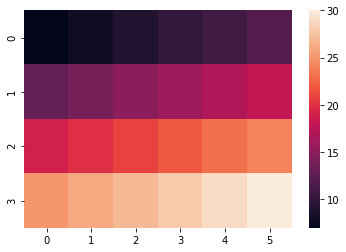

In [51]:
import seaborn as sns
sns.heatmap(X);

Eine solche Darstellung ist hilfsreich für die Bestimmung der relativen Abweichungen der gemessenen Daten. Wir haben zum Beispiel eine experimentelle Messreihe $Exp = [e_1, e_2, \cdots, e_n]$, deren theoretische Werte (Vorhersagen) eine andere Reihe $Calc = [c_1, c_2, \cdots, c_n]$ bilden. Aus den beiden Reihen bilden wir die Matrizen

$\underline{\underline{E}} = \begin{pmatrix}
|e_{1}-e_{1}| & |e_2-e_1| & \cdots & |e_{n}-e_{1}| \\
|e_1-e_2| & |e_2-e_2| & \cdots & |e_n-e_2| \\
\vdots & \vdots & \ddots & \vdots \\
|e_{1}-e_{n}| & |e_2-e_n| & \cdots & |e_{n}-e_{n}|
\end{pmatrix}$
und
$\underline{\underline{C}} = \begin{pmatrix}
|c_{1}-c_{1}| & |c_2-c_1| & \cdots & |c_{n}-c_{1}| \\
|c_1-c_2| & |c_2-c_2| & \cdots & |c_n-c_2| \\
\vdots & \vdots & \ddots & \vdots \\
|c_{1}-c_{n}| & |c_2-c_n| & \cdots & |c_{n}-c_{n}|
\end{pmatrix}$. 

Wir bestimmen die Beträge der Differenzen $\underline{\underline{D_{ij}}} = | \underline{\underline{E_{ij}}} - \underline{\underline{C_{ij}}}|$ und tragen $\underline{\underline{D}}$ als Wärmekarte auf. 

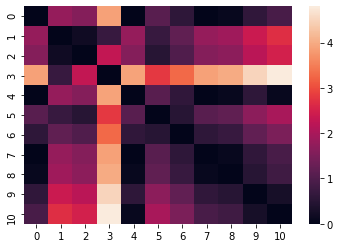

In [54]:
Exp  = [77.5, 75.1, 71.9, 75.8, 79.6, 82.3, 76.7, 76.9, 77.4, 83.5, 79.2]
Calc = [80.1, 75.9, 72.9, 74.5, 82.2, 83.8, 78.7, 79.5, 80.1, 86.7, 82.7]
def matrix(data):
    l = len(data)
    cube = np.zeros([l, l])
    for i in range(l):
        for j in range(l):
            cube[i,j] = abs(data[j] - data[i])
    return cube
E = matrix(Exp)
C = matrix(Calc)
D = abs(E - C)
sns.heatmap(D);

Auf diese Weise lässt sich der Datenpunkt Nr. 3 als verdächtig bestimmen. 
***